In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import load_dataset
import seaborn as sns
sns.set() 
%matplotlib inline


# Loading the titanic dataset 

In [4]:
#Reading data from csv in dataframe df
import pandas as pd

titanic_df = pd.read_csv('train.csv')


In [5]:
#Looking into data by dataframe head row data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#Checking data size
titanic_df.shape

(891, 12)

In [7]:
#checking columns data information, types and count of values
titanic_df.info()
#we can see from info that Age, Fare, and Cabin has missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

we have mostly missing values in age, and cabin

In [9]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Plotting the data to get insights 

# Exploration of Survived Class

<AxesSubplot:xlabel='Survived', ylabel='count'>

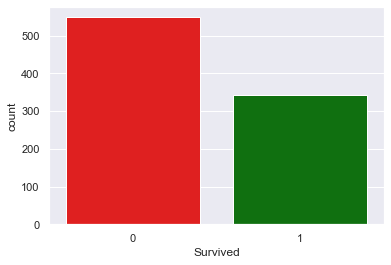

In [10]:
sns.countplot (x ="Survived", data = titanic_df, palette = ("red","green"))

# Exploration of Gender with Survived Class

<AxesSubplot:xlabel='Sex', ylabel='count'>

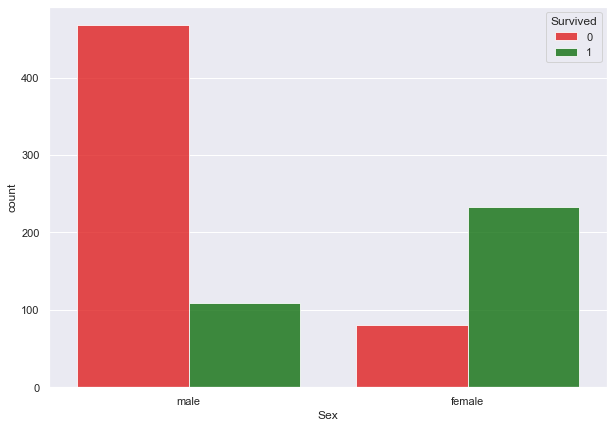

In [11]:
plt.figure(figsize=(10, 7))
sns.countplot (x ="Sex", hue = "Survived", data = titanic_df, palette = ("red","green"),alpha=0.8)

This plot shows us that men are more likely to not survive, whereas women have higher survival and less non survival count.

# Exploration of Age with Survived Class

<AxesSubplot:xlabel='Survived', ylabel='Age'>

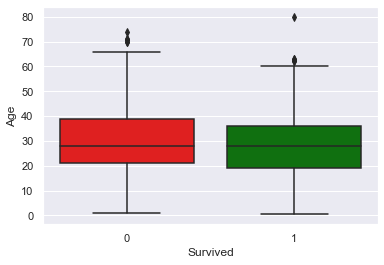

In [13]:
sns.boxplot(x = 'Survived', y = 'Age', data = titanic_df, palette = ("red","green"))

# Exploration of Pclass with Survived Class

<AxesSubplot:xlabel='Pclass', ylabel='count'>

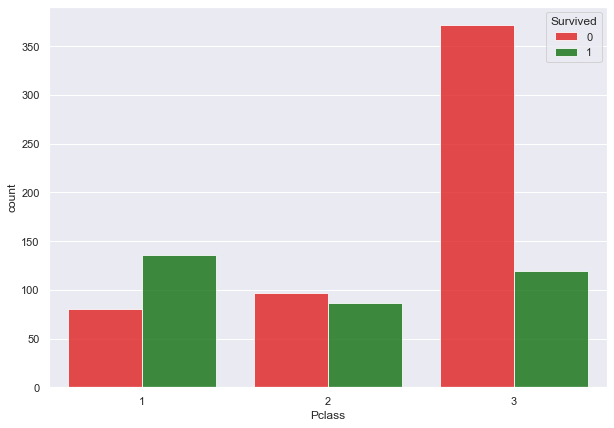

In [14]:
plt.figure(figsize=(10, 7))
sns.countplot (x ="Pclass", hue = "Survived", data = titanic_df, palette = ("red","green"),alpha=0.8)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

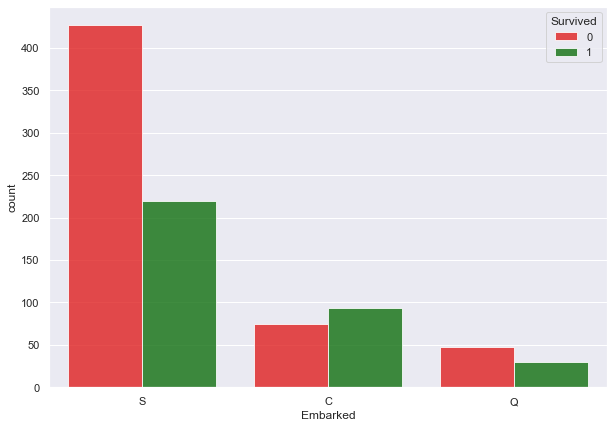

In [45]:
titanic_df["Embarked"].fillna(titanic_df['Embarked'].value_counts().idxmax(), inplace=True)
plt.figure(figsize=(10, 7))
sns.countplot (x ="Embarked", hue = "Survived", data = titanic_df, palette = ("red","green"),alpha=0.8)

# Feature Engineering , from SibSp and Parch, and checking alone or with family

<AxesSubplot:xlabel='Alone', ylabel='count'>

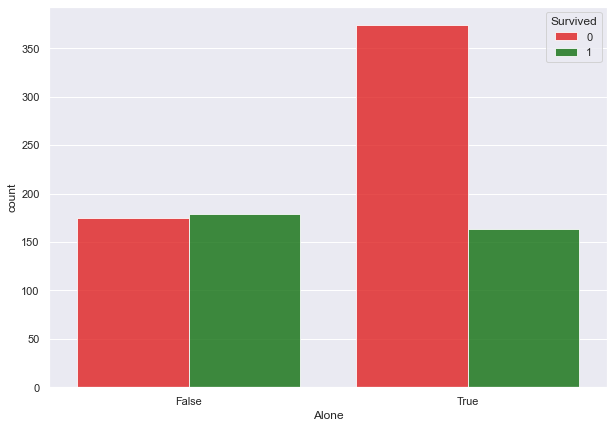

In [15]:
alone=(titanic_df["SibSp"]==0) & (titanic_df["Parch"]==0)
titanic_df["Alone"]=alone
plt.figure(figsize=(10, 7))
sns.countplot (x ="Alone", hue = "Survived", data = titanic_df, palette = ("red","green"),alpha=0.8)

# Exploration of Alone with Age 

<AxesSubplot:xlabel='Alone', ylabel='Age'>

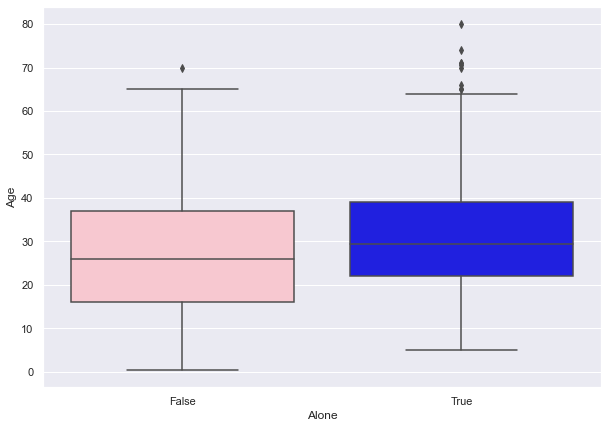

In [16]:
plt.figure(figsize=(10, 7))
sns.boxplot(x = 'Alone', y = 'Age', data = titanic_df, palette = ("pink","blue"))

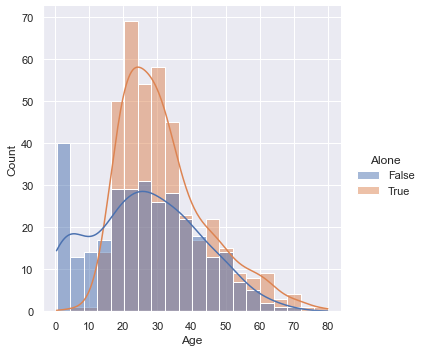

In [17]:
sns.displot(titanic_df, x="Age", hue="Alone",kde=True)


# Filling in null values on Gender and Alone basis

In [18]:
titanic_df.loc[(titanic_df['Sex'] =='male')  & (titanic_df['Alone'] == True) & (titanic_df['Age'].isnull()), 'Age'] = titanic_df.loc[(titanic_df['Sex'] == 'male') &(titanic_df['Alone'] == True), 'Age'].median()
titanic_df.loc[(titanic_df['Sex'] =='female')  & (titanic_df['Alone'] == True) & (titanic_df['Age'].isnull()), 'Age'] = titanic_df.loc[(titanic_df['Sex'] == 'female') &(titanic_df['Alone'] == True), 'Age'].median()
titanic_df.loc[(titanic_df['Sex'] =='male')  & (titanic_df['Alone'] == False) & (titanic_df['Age'].isnull()), 'Age'] = titanic_df.loc[(titanic_df['Sex'] == 'male') &(titanic_df['Alone'] == False), 'Age'].median()
titanic_df.loc[(titanic_df['Sex'] =='female')  & (titanic_df['Alone'] == False) & (titanic_df['Age'].isnull()), 'Age'] = titanic_df.loc[(titanic_df['Sex'] == 'female') &(titanic_df['Alone'] == False), 'Age'].median()
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Alone            0
dtype: int64

In [19]:
titanic_df['Age'].describe()

count    891.000000
mean      29.487284
std       13.038084
min        0.420000
25%       22.000000
50%       29.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

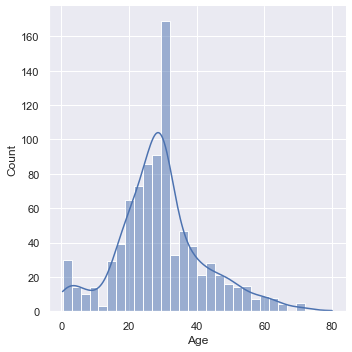

In [79]:
sns.displot(titanic_df, x="Age",kde=True)

# Exploration of Age, Gender with Survived Class

<AxesSubplot:xlabel='Sex', ylabel='Age'>

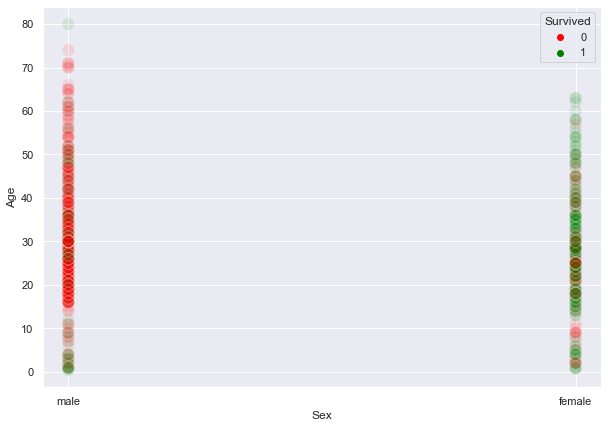

In [172]:
plt.figure(figsize=(10, 7))
sns.scatterplot (x ="Sex",y="Age", hue = "Survived", data = titanic_df ,  alpha=0.1,s=150, palette = ("red","green"))

<AxesSubplot:xlabel='AgeBin', ylabel='count'>

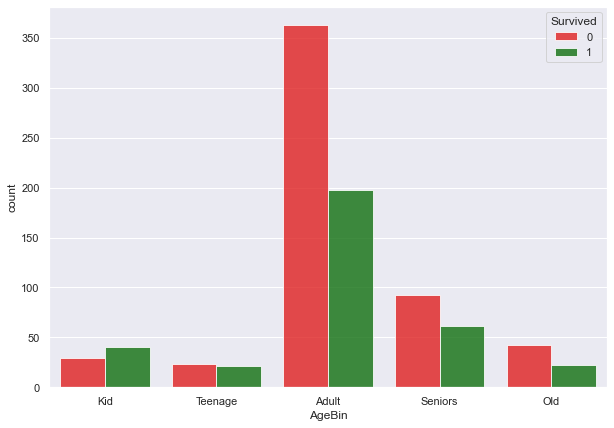

In [80]:
bins = [0,12,17,35,50, 80]
labels = ['Kid','Teenage', 'Adult','Seniors', 'Old']
titanic_df['AgeBin'] = pd.cut(titanic_df['Age'], bins = bins, labels=labels)
plt.figure(figsize=(10, 7))
sns.countplot (x ="AgeBin", hue = "Survived", data = titanic_df, palette = ("red","green"),alpha=0.8)

In [82]:
titanic_df.drop('SibSp', axis=1, inplace=True)
titanic_df.drop('Parch', axis=1, inplace=True)
titanic_df.drop('Cabin', axis=1, inplace=True)
titanic_df.drop('Fare', axis=1, inplace=True)
titanic_df.drop('PassengerId', axis=1, inplace=True)
titanic_df.drop('Name', axis=1, inplace=True)
titanic_df.drop('Ticket', axis=1, inplace=True)
titanic_df.drop('Age', axis=1, inplace=True)


titanic_df

,Survived,Pclass,Sex,Embarked,Alone,AgeBin
0,0,3,male,S,False,Adult
1,1,1,female,C,False,Seniors
2,1,3,female,S,True,Adult
3,1,1,female,S,False,Adult
4,0,3,male,S,True,Adult
...,...,...,...,...,...,...
886,0,2,male,S,True,Adult
887,1,1,female,S,True,Adult
888,0,3,female,S,False,Adult
889,1,1,male,C,True,Adult


In [60]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Sex       891 non-null    object  
 3   Age       891 non-null    float64 
 4   Embarked  891 non-null    object  
 5   Alone     891 non-null    bool    
 6   AgeBin    891 non-null    category
dtypes: bool(1), category(1), float64(1), int64(2), object(2)
memory usage: 36.9+ KB


In [83]:
t_df=pd.get_dummies(titanic_df,columns=["Sex","Embarked","AgeBin"])
t_df

,Survived,Pclass,Alone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,AgeBin_Kid,AgeBin_Teenage,AgeBin_Adult,AgeBin_Seniors,AgeBin_Old
0,0,3,False,0,1,0,0,1,0,0,1,0,0
1,1,1,False,1,0,1,0,0,0,0,0,1,0
2,1,3,True,1,0,0,0,1,0,0,1,0,0
3,1,1,False,1,0,0,0,1,0,0,1,0,0
4,0,3,True,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,True,0,1,0,0,1,0,0,1,0,0
887,1,1,True,1,0,0,0,1,0,0,1,0,0
888,0,3,False,1,0,0,0,1,0,0,1,0,0
889,1,1,True,0,1,1,0,0,0,0,1,0,0


In [84]:

X = t_df.drop(['Survived'],axis=1)

# separating Target variable
Y = t_df['Survived']


In [85]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.25,random_state=10, shuffle=True)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(668, 12) (668,)
(223, 12) (223,)


In [86]:
xtrain.head()

,Pclass,Alone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,AgeBin_Kid,AgeBin_Teenage,AgeBin_Adult,AgeBin_Seniors,AgeBin_Old
578,3,False,1,0,1,0,0,0,0,1,0,0
323,2,False,1,0,0,0,1,0,0,1,0,0
654,3,True,1,0,0,1,0,0,0,1,0,0
157,3,True,0,1,0,0,1,0,0,1,0,0
692,3,True,0,1,0,0,1,0,0,1,0,0


In [87]:
from sklearn.linear_model import LogisticRegression
# we import the logistic regression model from here
lr = LogisticRegression(random_state=10,max_iter=1000)
# making object of the model with default parameters and random_state =10)


In [88]:
lr.fit(xtrain, ytrain)
pred = lr.predict(xtest)

In [89]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
lr_acc = accuracy_score(ytest, pred)

In [90]:
lr_acc

0.8340807174887892